#### Homework 1

## Pair Programming Group Number: 4
## Members of Team: Alex Chiu, Ella Jiang


### Data Manipulation and Visualization!

In our first assignment you will practice manipuating and visualizing data from a real wold data set, Melbourne Australia home sales records. 

### The Data

Was taken from a Kaggle competition, and came with the following descriptions:
Content & Acknowledgements

```
This data was scraped from publicly available results posted every week from Domain.com.au, I've cleaned it as best I can, now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

….Now with extra data including including property size, land size and council area, you may need to change your code!

Some Key Details
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Latitude: Self explanitory

Longtitude: Self explanitory
```


## Q1 - Loading Data
Using the file melb_data.csv load it into a pandas DataFrame. If you need to look up the
syntax on how to read csv files you can find it [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

Name your DataFrame `df`

In [30]:
# Standard Import Commands
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in Data Frame
df = pd.read_csv('melb_data.csv')

## Q2 - How many unique suburbs are there?

Are there any pandas DataFrame operations that can do this for you?

[This](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html) function might help. 

In [2]:
suburbs = df["Suburb"]
num_sub = suburbs.nunique()

print("There are " + str(num_sub) +" unique suburbs.");

There are 314 unique suburbs.


## Q3 - How many unique properties are there?

If you forget the names of the columns you can always type:

`df.columns` 

in a cell by itself to see this list of column names.

In [6]:
group = df.groupby(["Address","Suburb","Postcode"])

print("There are " + str(len(group)) + " unique properties.")

## Q4 - What is the mean price of a property in the Kensington suburb?

You are getting the hang of reading the documentation!  Try finding the function
for mean yourself at the [root page](https://pandas.pydata.org/pandas-docs/stable/index.html) of the documentation.

In [4]:
mean_price_ken = df["Price"][df["Suburb"] == "Kensington"].mean()

print("The mean price of a property in the Kensington suburb is $"+ str(round(mean_price_ken,2)))

The mean price of a property in the Kensington suburb is $831667.44


## Q5 - What percentage of properties contain a YearBuilt value?

In [5]:
num_prop = len(df)
percent_year_built = len(df[df["YearBuilt"].notna()]) / num_prop * 100

print(str(round(percent_year_built,2)) + " % of properties contain a YearBuilt value.")

60.42 % of properties contain a YearBuilt value.


## Q6 - Plot the Landsize as a histogram using 20 bins. Say something interesting about the graph.

Matplotlib is [here](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html) to help. 

In data visualization we discuss the "Ink Ratio" of creating graphics.  If you use the default bin sizes of the matplotlib histogram function, you will find that the histogram is not very informative.  Use the documentation to guide you to adjust the width of the bins in the histogram to make one _really_ wide bin on the right, and the rest of the bins equally distributed where most of the data resides. 

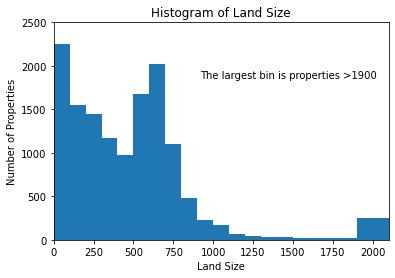

In [20]:
# land_size = df["Landsize"][df["Landsize"] != 0] # Take all landsize values greater than 0
# land_size_hist = plt.hist(land_size, bins=[])

landSize = df[df["Landsize"].notna()]["Landsize"] #df["Landsize"]

bins = []
total = 0.

for i in range(20):
    bins.append(i*100)

bins.append(landSize.max())

plt.hist(landSize,bins=bins)
landSize.max()
plt.xlim(0,100*21)
plt.ylim(0,2500)
plt.title("Histogram of Land Size")
plt.ylabel("Number of Properties")
plt.xlabel("Land Size")
plt.annotate("The largest bin is properties >1900",xy=(200, 200), xycoords='figure pixels')
plt.show()

## Q7 - Plot a scatter plot of price as a function of BuildingArea using only rows that have a valid BuildingArea value

Break this down into slicing the DataFrame first, then creating the visualization.  There are both `plot` and `scatter` 
functions in the matplotlib library that can help here.  You'll notice there is more than one way to do a thing so much in computer science 😄

If you have to change your axes and end up excluding some points to make the data more visible, then annotate the number of points excluded in the graph. 

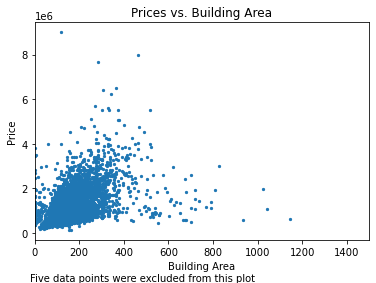

In [21]:
# Number of points excluded: 5

# Slice data frame
df_val_building_area = df[df["BuildingArea"].notna()]
df_building_area = df_val_building_area["BuildingArea"]
df_price = df_val_building_area["Price"]

# Visualize data
plt.scatter(df_building_area, df_price, s=5)
plt.xlim(0, 1500)
plt.title("Prices vs. Building Area")
plt.xlabel("Building Area")
plt.ylabel("Price")
plt.annotate("Five data points were excluded from this plot",xy=(30, 2), xycoords='figure pixels')
plt.show()

## Q8 - List the top 10 SellerG, and what percentage of properties they have listed 

I'm going to assume that the SellerG column is the name of the seller group, so "realtor" in US parlance.  So, that column is interpreted as the seller that listed the property.

Check out the function `value_counts` in pandas documentation. 

In [22]:
# Find the top 10 sellers
num_prop = len(df)
sellers = df["SellerG"]
top_10_sellers = sellers.value_counts().head(10)

# Find the percentage of properties that are listed under them
percent_top_10 = top_10_sellers.sum() / num_prop * 100

In [23]:
top10string = "The top 10 sellers are"
for i in top_10_sellers.index.tolist():
    top10string += " " + i +","
    
print (top10string[:-1])

The top 10 sellers are Nelson, Jellis, hockingstuart, Barry, Ray, Marshall, Buxton, Biggin, Brad, Woodards


In [25]:
print(str(round(percent_top_10,2)) + " % of properties were listed by the top 10 sellers")
print(top_10_sellers)

59.55 % of properties were listed by the top 10 sellers
Nelson           1565
Jellis           1316
hockingstuart    1167
Barry            1011
Ray               701
Marshall          659
Buxton            632
Biggin            393
Brad              342
Woodards          301
Name: SellerG, dtype: int64


## Q9 - Fix a problem
Your boss has told you that the number of rooms was calculated incorrectly systematically across the entire data set.  Add one room to the Rooms column using two methods:

 - a for loop, and
 - using a single statement
 
Save those DataFrames into the variables `df1` and `df2`.  (We don't use these again, for the next questions just continue using `df`)

Watch out that you don't accidentally change the original DataFrame using a shallow copy.

In [11]:
# Create two new deep copies of the data frame
df1 = df.copy(deep=True)
df2 = df.copy(deep=True)

# First method:
for i in range(len(df1)):
    df1.at[i, "Rooms"] += 1
    
# Second method:
df2["Rooms"] += 1

In [12]:
df["Rooms"].head()

0    2
1    2
2    3
3    3
4    4
Name: Rooms, dtype: int64

In [13]:
df1["Rooms"].head()

0    3
1    3
2    4
3    4
4    5
Name: Rooms, dtype: int64

In [14]:
df2["Rooms"].head()

0    3
1    3
2    4
3    4
4    5
Name: Rooms, dtype: int64

## Q10- What is the Address of the earliest built house in the data set?

This will exercise your DataFrame slicing ability. 

In [31]:
# Find the earliest house built
earliest_house = df[df["YearBuilt"] == df["YearBuilt"].min()]


print("The Address of the earliest house built in the data set is: " + str(earliest_house["Address"].item()))

The Address of the earliest house built in the data set is: 5 Armstrong St


## Q11 - Save a file 

The council member for Melbourne has asked for the information for their district.  Assume that there are legal restrictions and we can only provide the council member the Suburb, Price, and Date from the CouncilArea "Melbourne" to the council person.  Export the file with only the allowed columns, and do not write and index column.

The other half of `read_csv`, is `to_csv`.  Make sure you follow the documentation and only include the columns asked for in the output.

In [16]:
melb_data = df[df["CouncilArea"] == "Melbourne"]
stripped_melb_data = melb_data[["Suburb", "Price", "Date"]]
stripped_melb_data.to_csv("data_for_cm.csv", index=False)

In [17]:
newdf= pd.read_csv("data_for_cm.csv")
newdf

,Suburb,Price,Date
0,Flemington,957000.0,22/05/2016
1,Kensington,785000.0,3/09/2016
2,Kensington,852000.0,3/09/2016
3,Kensington,1037000.0,3/09/2016
4,Kensington,775000.0,3/12/2016
...,...,...,...
465,Melbourne,565000.0,29/07/2017
466,Melbourne,540000.0,29/07/2017
467,North Melbourne,681000.0,29/07/2017
468,North Melbourne,1803000.0,29/07/2017
